# Praca z danymi 2D

In [68]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
#live zakomentujcie bo animacje!!!

# Dane 2D: contour, contourf, imshow

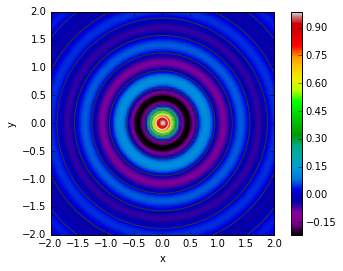

In [69]:
x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(10*R)/(10*R)
IM = plt.imshow(Z, origin='lower', cmap='spectral',
                extent=[-2, 2, -2, 2])
plt.contour(X, Y, Z, cmap='gray')
plt.colorbar(IM)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

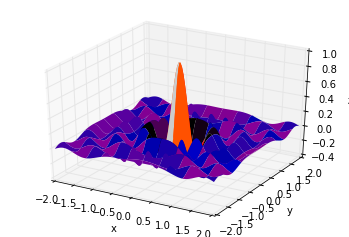

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
wireframe = ax.plot_surface(X, Y, Z, linewidth=0, cmap='spectral')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# Animacja 2D

(60, 50, 50)


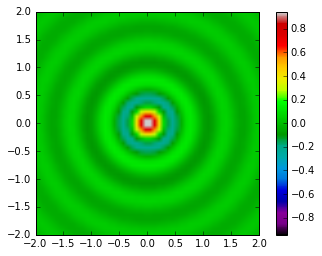

In [73]:
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D
x = y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(10*R)/(10*R)

T = np.linspace(0, 2*np.pi, 60)

Z_lista = np.asarray([Z*np.cos(t) for t in T])
print(Z_lista.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
IM = ax.imshow(Z, origin='lower', cmap='spectral', 
               extent=[-2, 2, -2, 2], vmax = Z.max(), vmin = -Z.max())
plt.colorbar(IM)

def animate(i):
    IM.set_array(Z_lista[i])
    return [IM]
animation = ani.FuncAnimation(fig, animate, frames=range(len(T)))
plt.show()

# Wizualizacja danych 2D w 3D

(60, 100, 100)


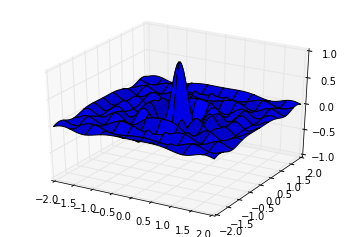

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as ani

x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(10*R)/(10*R)

T = np.linspace(0, 2*np.pi, 60)

Z_lista = np.asarray([Z*np.cos(t) for t in T])
print(Z_lista.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
wf = ax.plot_surface(X, Y, Z, vmin=-1, vmax=+1)
ax.set_zlim(-1,1)

def animate(i):
    ax.clear()
    ax.set_zlim(-1,1)
    wf = ax.plot_surface(X, Y, Z_lista[i], vmin=-1, vmax=+1)
    return [wf]

animation = ani.FuncAnimation(fig, animate, frames=range(60))
plt.show()

# Równanka różniczkowe

$$\ddot{\theta} = -\frac{g}{l} \sin{\theta}$$
$$\ddot{\theta} + \frac{g}{l} \theta = 0 $$

$$\dot{\theta} = \omega$$
$$\dot{\omega} = \ddot{\theta} = -\frac{g}{l} \sin{\theta}$$

$$\dot{\vec{r}} = f(\vec{r}, t)$$

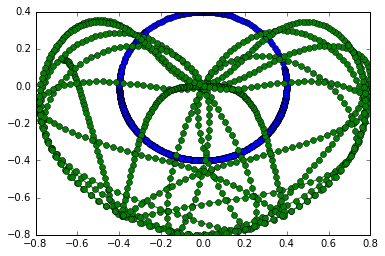

In [80]:
from scipy.integrate import odeint
from wahadlo import f, locations

g = 9.81
l = 1

def pochodna_wahadlo(r, t, g=g, l = l ):
    """
    zwraca pochodną czasową stanu wahadła
    r: wektor stanu [kąt, prędkość kątowa] (raczej jako macierz np)
    t: czas
    g: no g, no
    l: długość wahadła
    """
    theta, omega = r
    return np.array([omega, -g/l*np.sin(theta)])

r = (np.random.random(4) * 2 - 1 ) * np.pi
T = np.linspace(0, 10, 1000)

wynik = locations(odeint(f, r, T).T)
x1, y1, x2, y2 = wynik

fig = plt.figure()
ax = fig.add_subplot(111)
linia1 = ax.plot(x1, y1, "b-")[0]
linia2, = ax.plot(x2, y2, "g-")

kulka1 = ax.plot(x1, y1, "bo")[0]
kulka2, = ax.plot(x2, y2, "go")

def init():
    linia1.set_data([], [])
    linia2.set_data([], [])
    kulka1.set_data([], [])
    kulka2.set_data([], [])
    return [linia1, linia2, kulka1, kulka2]

def animate(i):
    linia1.set_data(x1[:i+1], y1[:i+1])
    linia2.set_data(x2[:i+1], y2[:i+1])
    kulka1.set_data(x1[i], y1[i])
    kulka2.set_data(x2[i], y2[i])
    return [linia1, linia2, kulka1, kulka2]

# animacja = ani.FuncAnimation(fig, animate, frames=range(len(T)),
#                             init_func = init, blit = True, interval=10)
plt.show()

# Atraktor Lorentza

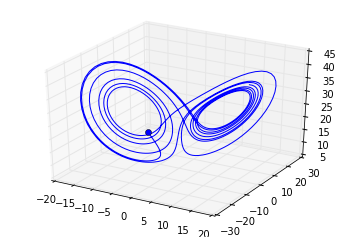

In [83]:
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D

sigma = 10
beta = 8/3
rho = 28

def pochodna(r, T):
    x, y, z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y - beta*z
    return np.array([dxdt, dydt, dzdt])

from scipy.integrate import odeint

r = (np.random.random(3) * 2 - 1 ) * 20
T = np.linspace(0, 10, 1000)

wynik = odeint(pochodna, r, T).T
X, Y, Z = wynik

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
linia = ax.plot(X, Y, Z, "b-")[0]
kulka = ax.plot([X[0]], [Y[0]], [Z[0]], "bo")[0]

def init():
    linia.set_data([], [])
    linia.set_3d_properties([])
    kulka.set_data([], [])
    kulka.set_3d_properties([])
    return [linia, kulka]

def animate(i):
    linia.set_data(X[:i+1], Y[:i+1])
    linia.set_3d_properties(Z[:i+1])
    
    kulka.set_data(X[i], Y[i])
    kulka.set_3d_properties(Z[i])
    return [linia, kulka]

# animacja = ani.FuncAnimation(fig, animate, frames=range(len(T)),
#                             init_func = init, blit = True, interval=10)
plt.show()